c:\Users\Lars\Documents\GitHub\FEM\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


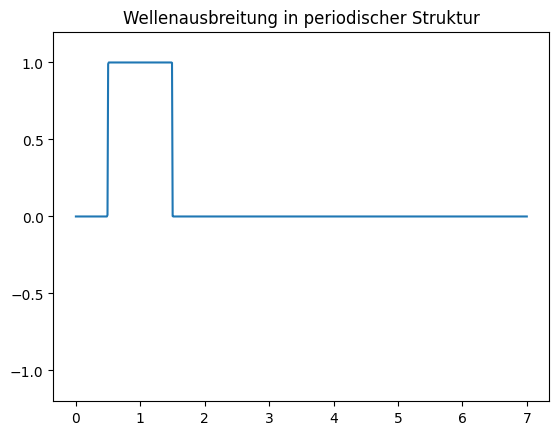

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameter
L = 7          # Balkenlänge
N = 700        # Diskretisierungspunkte
x = np.linspace(0, L, N)
dx = x[1] - x[0]
c0 = 1.0       # Grundgeschwindigkeit
a = 1.0        # Periodenlänge
h = 0.5        # Sprungfaktor (Impedanz)

# Wellengeschwindigkeit mit periodischer Modulation
c = np.ones_like(x) * c0
for i in range(N):
    if int(x[i] // a) % 2 == 1:
        c[i] *= 1 - h  # "Stufen" mit reduzierter Ausbreitungsgeschwindigkeit

# Anfangsauslenkung: Rechteckimpuls
u = np.zeros_like(x)
u[(x > 0.5) & (x < 1.5)] = 1.0
u_old = u.copy()
u_next = np.zeros_like(u)

# Zeitschritte
dt = 0.001
steps = 400
frames = 100
plot_every = steps // frames
results = []

# FDTD-Zeitintegration
for step in range(steps):
    for i in range(1, N - 1):
        u_next[i] = (2 * u[i] - u_old[i] +
                     (dt**2 / dx**2) * c[i]**2 * (u[i + 1] - 2 * u[i] + u[i - 1]))
    u_old, u = u, u_next.copy()
    if step % plot_every == 0:
        results.append(u.copy())

# Animation
fig, ax = plt.subplots()
line, = ax.plot(x, results[0])
ax.set_ylim(-1.2, 1.2)
ax.set_title("Wellenausbreitung in periodischer Struktur")

def animate(i):
    line.set_ydata(results[i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(results), interval=50)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio

# --- Parameter ---
L = 7.0
N = 1400
x = np.linspace(0, L, N)
dx = x[1] - x[0]
dt = 0.001
steps = 24000
frames = 600
plot_every = steps // frames

# --- Wellengeschwindigkeit ---
c0 = 1.0
a = 1.0
h = 0.5
c = np.ones_like(x) * c0
for i in range(N):
    if int(x[i] // a) % 2 == 1:
        c[i] *= 1 - h

# --- Initialisierung ---
h1 = 1.0
h2 = 0.5
u = np.zeros_like(x)
u[(x > 2.5) & (x <= 3.5)] = h1
u[(x > 3.5) & (x <= 4.5)] = h2
u_old = u.copy()
u_next = np.zeros_like(u)
results = []


# --- Zeitintegration ---
for step in range(steps):
    for i in range(1, N - 1):
        u_next[i] = (2 * u[i] - u_old[i] +
                     (dt**2 / dx**2) * c[i]**2 * (u[i+1] - 2*u[i] + u[i-1]))
    u_next[0] = u_next[1]
    u_next[-1] = 0
    u_old, u = u, u_next.copy()
    if step % plot_every == 0:
        results.append(u.copy())

# --- GIF erstellen ---
gif_path = "wellenreflexion.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.05) as writer:
    for u_frame in results:
        fig, ax = plt.subplots()
        ax.plot(x, u_frame)
        ax.set_ylim(-1.2, 1.2)
        ax.set_title("Wellenreflexion: links frei, rechts fest")
        fig.canvas.draw() 
        image = np.frombuffer(fig.canvas.tostring_argb(), dtype='uint8')
        w, h = fig.canvas.get_width_height()
        image = image.reshape((h, w, 4))
        image = image[:, :, [1, 2, 3]]
        writer.append_data(image)
        plt.close(fig)

print(f"GIF gespeichert als {gif_path}")


GIF gespeichert als wellenreflexion.gif


: 